In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import decomposition
from numpy import genfromtxt
from sklearn import preprocessing


# Function Part

In [2]:
def PCAdata(file, accuracy):
    df = pd.read_csv(file, index_col = 0)
    y = df.Life_expectancy
    X = df.drop('Life_expectancy', axis=1)   
    pca = PCA()
    pca.fit(X)
    num = 0
    count1 = 0
    countlist = []
    valuelist = []
    
    for i in range(len(pca.explained_variance_ratio_)):
        num += pca.explained_variance_ratio_[i]
        count1 += 1
        if num >= accuracy: 
            break

    num = 0
    count = 1
    for i in range(len(pca.explained_variance_ratio_)):
        num += pca.explained_variance_ratio_[i]
        valuelist.append(num)
        countlist.append(count)
        count +=1
    return count1, valuelist, countlist

In [3]:
def PCCreate(count1, file):
    df = pd.read_csv(file, index_col = 0)
    y = df.Life_expectancy
    X = df.drop('Life_expectancy', axis=1)   
    pca = PCA()
    pca.fit(X)
    pca = decomposition.PCA(n_components=count1)
    pc = pca.fit_transform(X)    
    y = y.to_numpy()
    return pc,y

In [4]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

# Train Part

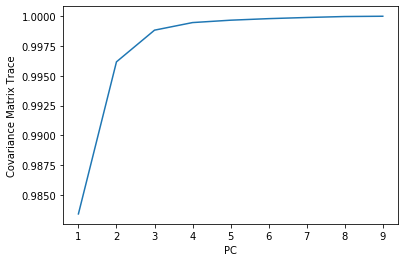

When PC >= 2 accuracy is more than 0.99.


In [5]:
PCnum, Accuracy, x_axis = PCAdata('Train.csv', 0.99)
plt.plot(x_axis,Accuracy)
plt.xlabel('PC') 
plt.ylabel('Covariance Matrix Trace')
plt.show()
print('When PC >=',PCnum, 'accuracy is more than 0.99.')

In [6]:
#algorithm='auto'
Traindf = pd.read_csv('Train.csv', index_col = 0)
TrainX, Trainy = PCCreate(PCnum, 'Train.csv')
le = preprocessing.LabelEncoder()
Trainy = le.fit_transform(Trainy)
neigh = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
neigh.fit(TrainX, Trainy)
Trainy_Original = le.inverse_transform(Trainy)
Predict_Train = neigh.predict(TrainX)
Predict_Train_Original = le.inverse_transform(Predict_Train)

<function matplotlib.pyplot.show(*args, **kw)>

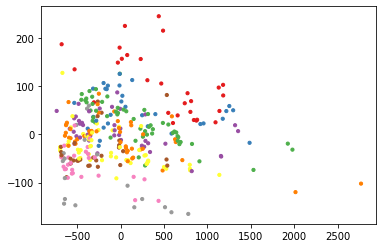

In [7]:
plt.scatter(TrainX[:, 0], TrainX[:, 1], c=Trainy, s=10, cmap='Set1')
plt.show

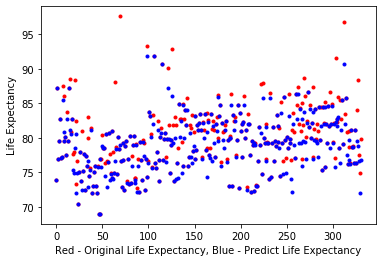

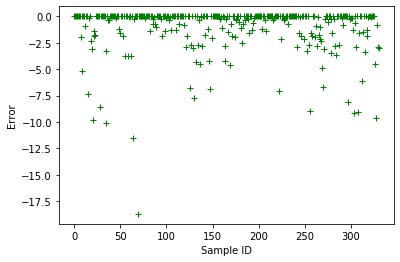

DescribeResult(nobs=331, minmax=(0.0, 18.69999999999999), mean=1.0842900302114804, variance=5.011691842900301, skewness=3.433610790037209, kurtosis=15.679554932375936)

In [8]:
KNNerrorlist, KNN_abs_errorlist = errorCalculate(Trainy_Original,Predict_Train_Original)
plt.plot(Trainy_Original, 'r.')
plt.plot(Predict_Train_Original, 'b.')
plt.xlabel('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()
plt.plot(KNNerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
np.savetxt("KNN_Train_P.csv", Predict_Train_Original.transpose(), delimiter=",")
stats.describe(KNN_abs_errorlist)

# Test Part

In [9]:
TestX, Testy = PCCreate(PCnum, 'Test.csv')
Predict_Test = neigh.predict(TestX)
Predict_Test_Original = le.inverse_transform(Predict_Test)

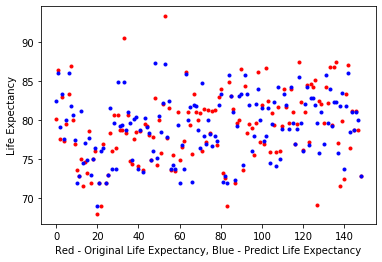

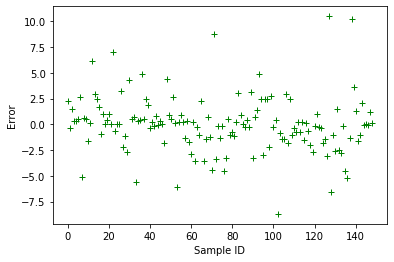

DescribeResult(nobs=149, minmax=(0.0, 10.5), mean=1.8328859060402694, variance=4.106411209867585, skewness=1.948952391103726, kurtosis=4.391923336409157)

In [10]:
KNNerrorlist, KNN_abs_errorlist = errorCalculate(Testy,Predict_Test_Original)
plt.plot(Testy, 'r.')
plt.plot(Predict_Test_Original, 'b.')
plt.xlabel('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()
plt.plot(KNNerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
np.savetxt("KNN_Test_P.csv", Predict_Test_Original.transpose(), delimiter=",")
stats.describe(KNN_abs_errorlist)